## Importing modules

In [2]:
import xarray as xr
from glob import glob
import xmitgcm
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path

In [3]:
path = os.getcwd()

In [4]:
nx, ny, nr, nt = 1000, 1, 100, 1

x,z = np.meshgrid(np.arange(0,nx),-np.arange(0,nr))

## Initial temperature and velocity

In [5]:
a = -0.2
c = 20
displace = 100
u = a*np.exp(-((x-(nx-displace))**2)/(2*10*c**2) -((z-0)**2)/(2*c**2))
u[:,-displace:] = u[:,-displace][:,None]
# u[:,:-displace] = u[:,-displace][:,None]

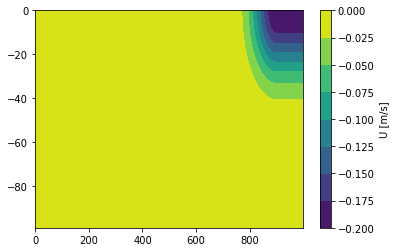

In [11]:
fig,ax = plt.subplots()
C = ax.contourf(x,z,u)
fig.colorbar(C,label='U [m/s]')

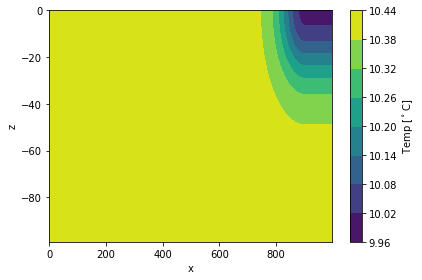

In [12]:
temp = u.copy()
# temp[:,:-displace] = temp[:,-displace][:,None]
temp = (temp-temp.min())*2 + 10


fig,ax = plt.subplots()

C = ax.contourf(x,z,temp)
_ = ax.set(xlabel='x',ylabel='z')
fig.colorbar(C,label='Temp [$^\circ$C]')
fig.tight_layout()

In [8]:
# u = x*2
# u = u-u.mean()
# u = u/u.max()
# u = u/5 - 0.4
# u[:,:300] = u[:,300][:,None]
# u[:,-300:] = u[:,-300][:,None]
# plt.contourf(x,z,u)
# plt.colorbar()

# Bathymetry

In [9]:
bat = x[0]*0-10
# bat[0] = 0
# bat[-1] = 0

## Saving binary files

In [10]:
xmitgcm.utils.write_to_binary(temp[:,None,-1].flatten(), os.path.join(path,'TEMP_E.bin'),dtype='float64')
xmitgcm.utils.write_to_binary(u[:,None,-1].flatten(), os.path.join(path,'U_E.bin'),dtype='float64')

xmitgcm.utils.write_to_binary(temp[:,None,0].flatten(), os.path.join(path,'TEMP_W.bin'),dtype='float64')
xmitgcm.utils.write_to_binary(u[:,None,0].flatten(), os.path.join(path,'U_W.bin'),dtype='float64')

xmitgcm.utils.write_to_binary(temp[:,None,:].flatten(), os.path.join(path,'TEMP.bin'),dtype='float64')
xmitgcm.utils.write_to_binary(u[:,None,:].flatten(), os.path.join(path,'U.bin'),dtype='float64')
xmitgcm.utils.write_to_binary(bat.flatten(), os.path.join(path,'BAT.bin'),dtype='float64')